## Homework 5
### Olivia Cooper
### Computational Astrophysics, Spring 2022

In [1]:
# the basics

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import astropy
from astropy.table import Table, SortedArray
import astropy.units as u
import astropy.constants as cns
import hyperion
import timeit
import matplotlib.patches as patches
import mc_util as mc
plt.style.use('cooper-paper.mplstyle')

### Problem 2: Computing time, please!

In this problem you will evaluate the scaling and parallel performance of a parallel code
on stampede2 and write subsections of a computing allocation request. If you are using
a parallel code for your research you can use that code for this homework. Otherwise, use
Hyperion to complete the exercises below. If you have more than one project allocation
on TACC, you can add #SBATCH -A ast381 to your submission script to charge our class
allocation for the computing time you use. See notes below on submitting jobs.

a) Scaling and Performance: Install your parallel code of choice on Stampede2 and get it
running. Set up and run a weak and a strong scaling test. Make plots of efficiency versus
number of processors for each of your tests with the results from 1 to at least 64 cores.
Include at least 5 points in each of your scaling relationships. To obtain consistent results,
make sure your jobs run on the same type of processor – on Stampede2 that means either
KNL or SKX processors.

In [29]:
# results of scaling tests, from set of hyperion YSO runs on TACC
n = np.array([1,4,12,32,48,64]) # number of cores
cput = np.array([2876.45,3169.00,3288.98,4953.67,4146.78,4824.05]) # cpu time from terminal output
t = cput/n # convert cpu time to wall time
t1 = cput[0] # time to run in serial (1 core)
su = cput/t1 # speedup
e = su/n # efficiency

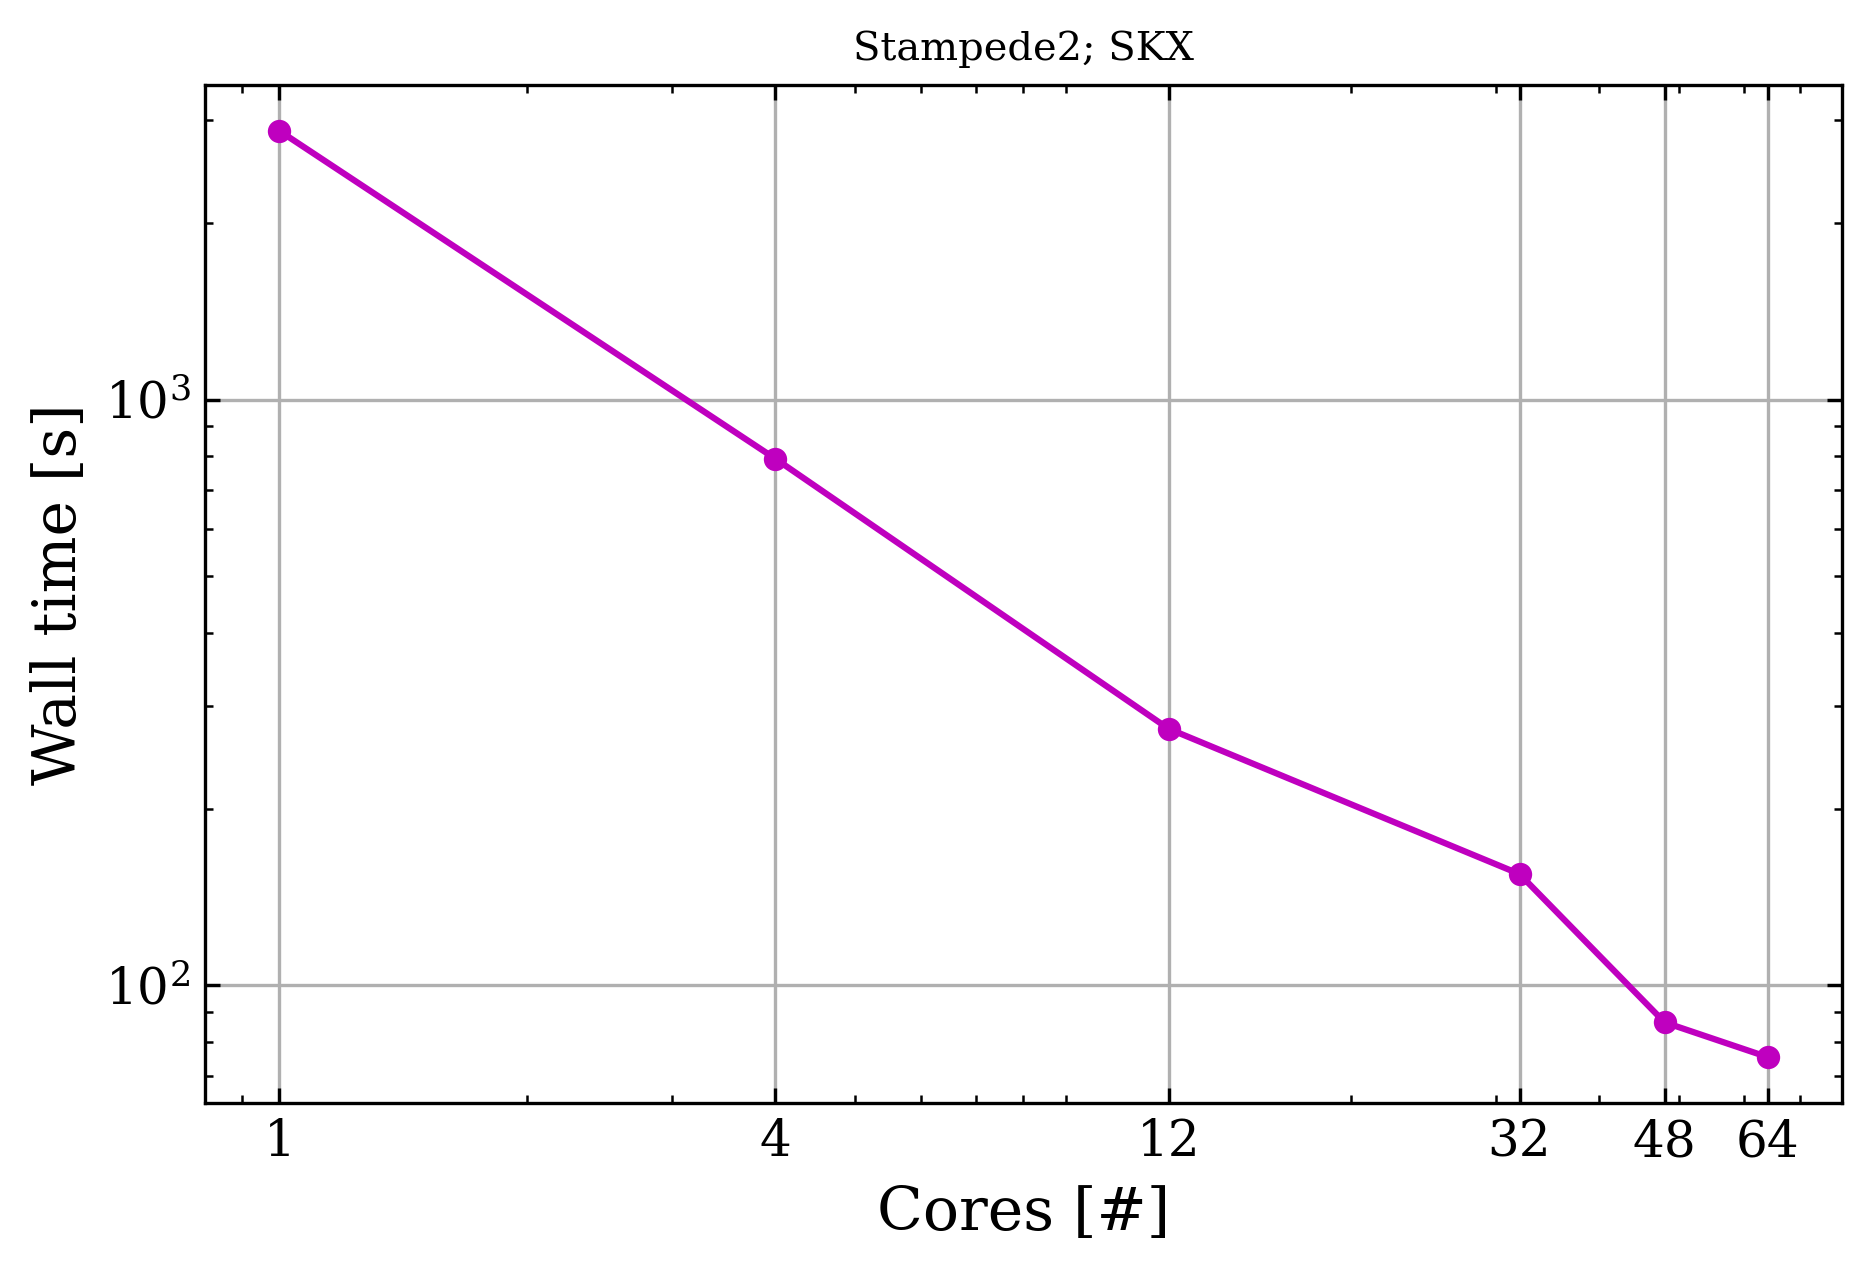

In [39]:
# strong scaling

plt.plot(n,t,'-mo')
plt.yscale('log')
plt.xscale('log')
plt.xticks(n,labels=n)
plt.xlabel('Cores [#]')
plt.ylabel('Wall time [s]')
plt.title('Stampede2; SKX')
plt.savefig('ysostrongscaling.png')

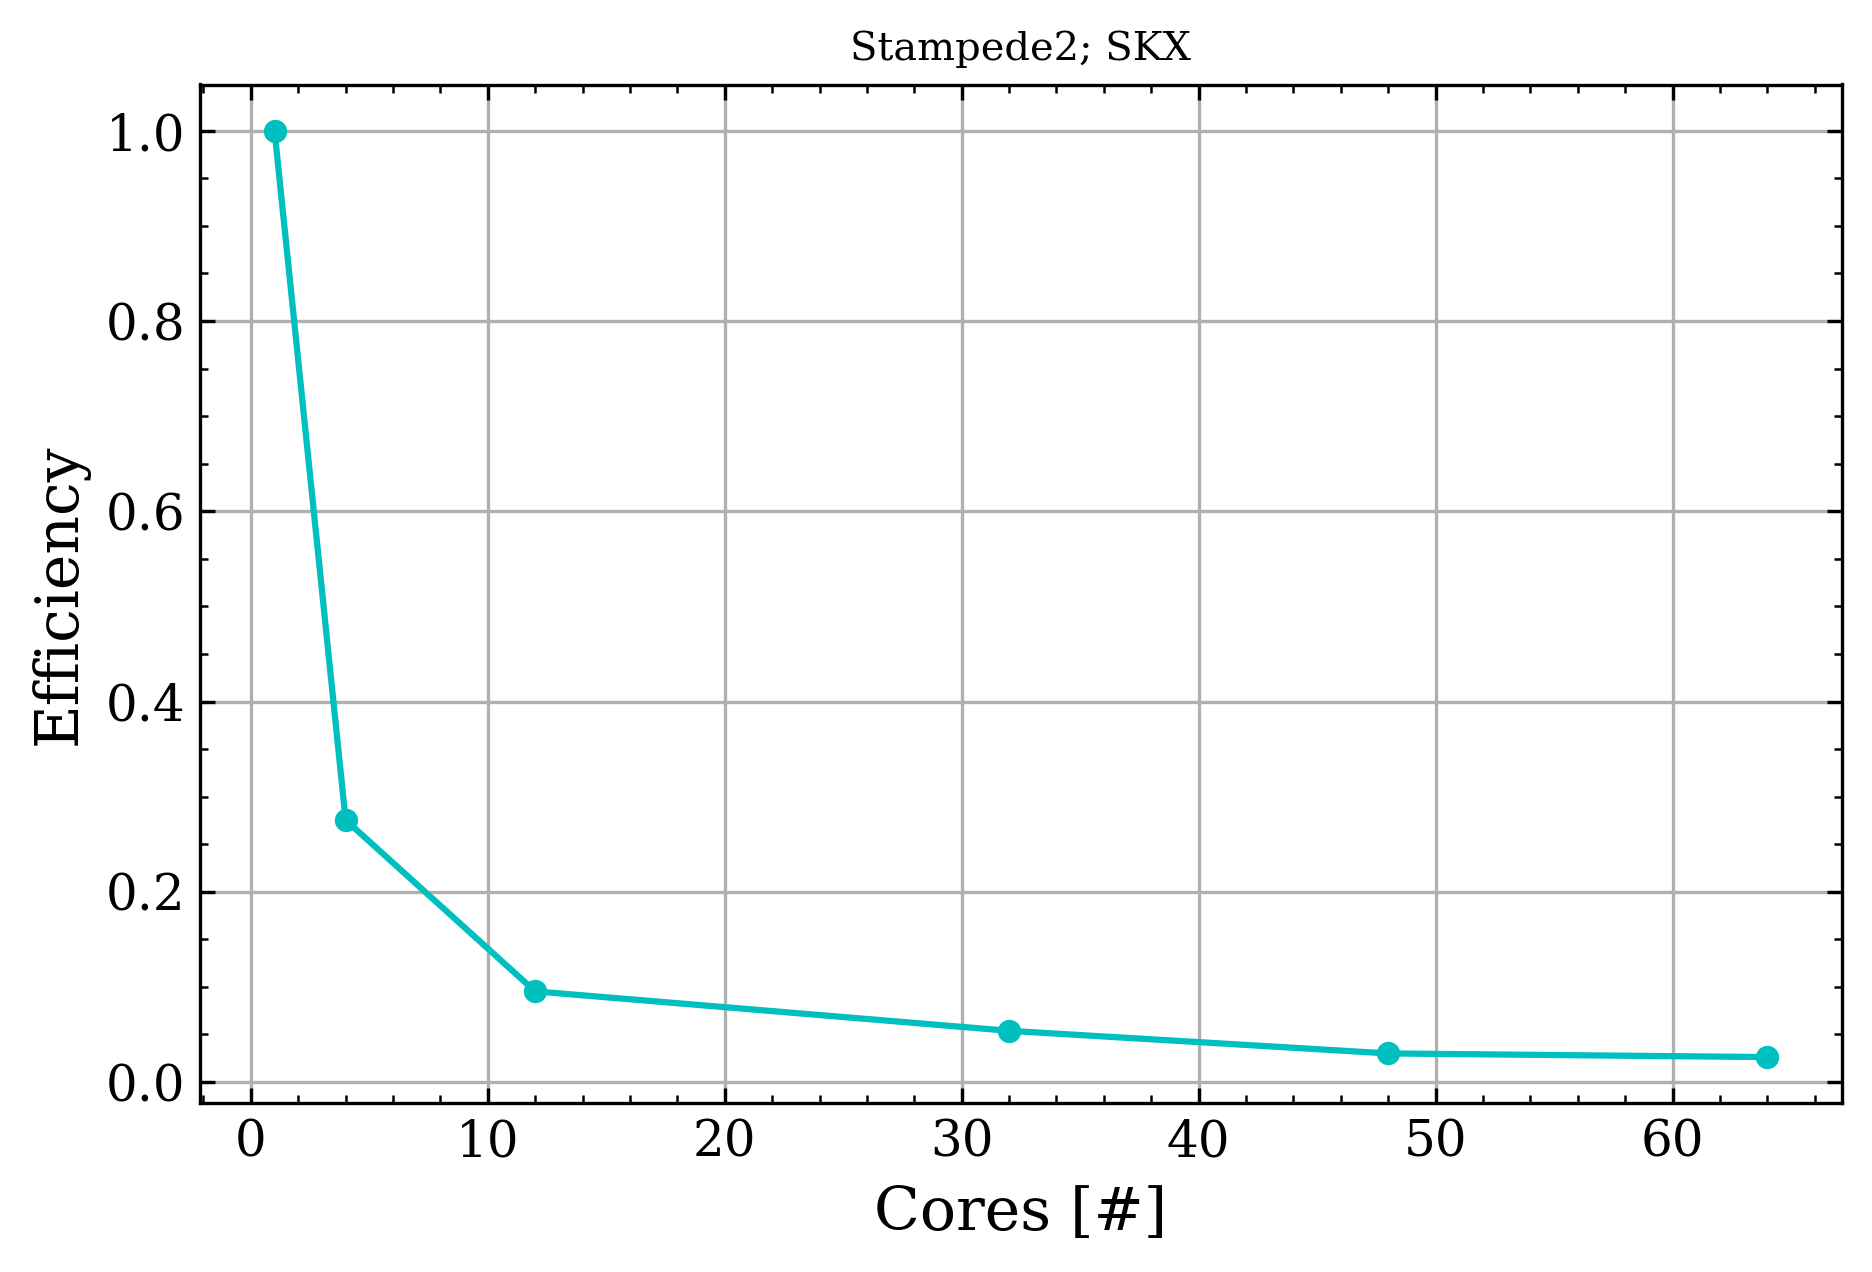

In [40]:
# weak scaling

plt.plot(n,e,'-co')
plt.xlabel('Cores [#]')
plt.ylabel('Efficiency')
plt.title('Stampede2; SKX')
plt.savefig('ysoweakscaling.png')

c) Describing Performance: Using the Simon et al. code performance document as an
example, write a summary of your tests and the results. Evaluate whether the results are
“good” or not. (Note: if you are working with hyperion, the Robitaille (2011) hyperion
method paper includes some discussion and results for how hyperion scales, which are a useful point of reference.) Comment on any features in the plots. If you find your code
doesn’t scale “well,” you may want to experiment with the problem setup, e.g., in terms of
the size and work per core. )

In log-log scale, the strong scaling relationship is fairly linear until an uptick at 64 cores when it starts to scale more poorly. Up to then, it seems to perform fairly well and as expected. The weak scaling plot tells a different story, where efficiency plummets as the number of cores increase. This may be due to a problem with the way the runs are set up.